# Regression

$\bf{Prediction}$ comes into play when we are given a set of observed feature values $X$, and want to use them to predict another feature value $y$.
Usually $X$ is a $n \times m$ matrix, where $n$ is the number of data samples and $m$ is the number of features, and $y$ is a $n$ dimention vector.
$$(X_{i,0}, X_{i,1}, ... X_{i,m-1}, y_i) \\ i=0,1,..,n-1 $$
When $y$ is a continuous value, instead of categorical value, we usually apply $\bf{regression}$ methods to fit and predict $y$.

## Assumption

The $\bf{assumption}$ we make when we want to use $X$ to predict $y$ is that $y$ is somewhat dependent on $X$. However that is not always the case.
So before jumping into regression, we might want to start by validating our assumption that $X$ and $y$ are related. 

### Correlation

One way we can verify the relation between $X$ and $y$ is by calculating their correlation.
$$ Corr(X,y) = Cov(X,y) / [Var(X)Var(y)]^{1/2} $$

In [7]:
import pandas as pd
df = pd.read_csv('~/Data/real_estate.csv')
len(df), df.columns

(414,
 Index(['No', 'X1 transaction date', 'X2 house age',
        'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
        'Y house price of unit area'],
       dtype='object'))

In [14]:
house_age = df['X2 house age']
distance_mrt = df['X3 distance to the nearest MRT station']
y = df['Y house price of unit area']

In [25]:
import numpy as np
corr_house_age = np.corrcoef(house_age, y)[0][1]
corr_distance_mrt = np.corrcoef(distance_mrt, y)[0][1]

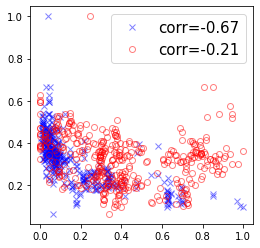

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
p1 = ax.plot(
    distance_mrt/max(distance_mrt), y/max(y), 
    'bx', alpha=0.5, label=f"corr={corr_distance_mrt:.2f}"
)
p2 = ax.plot(
    house_age/max(house_age), y/max(y), 
    'ro', mfc='none', alpha=0.5, label=f"corr={corr_house_age:.2f}")
ax.legend(fontsize=15)

### Permutation test

If $X$ and $y$ have no correlation, we can say that they are independently draw from their own distribtuions. That means if we want to create a sample of $(X_j, y_j)$ that has the same distribution of $(X, y)$, we can simply draw from $X$ and $y$ separately.

In [60]:
distance_mrt_redraw = np.random.choice(distance_mrt,500)
y_redraw = np.random.choice(y,500)

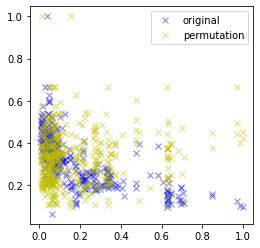

In [63]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(distance_mrt/max(distance_mrt), y/max(y), 
        'bx', alpha=0.5, label='original')
ax.plot(distance_mrt_redraw/max(distance_mrt),y_redraw/max(y), 
        'yx',alpha=0.5, label='permutation')
ax.legend()

## linear model

Linear Regression: $y=X\beta + \sigma$

Note: what "linear" refers to is $\beta$ rather than $X$. You can always redefine a new $X$ as a nonlinear combination of $X$.

$\sigma$ is the intrinsic variance of $y$ given $X$, and in linear models, we usually assume $\sigma \~ Normal(0, \sigma)$ 

The reason that intrinsic variance exists is that we will almost never be able to get all the factors that relate to $y$. If we can, $y$ will be deterministic given $X$. In reality, we are almost always facing cases where we can only think of, and have access to some observables.

## Extend from linear model

Generalized linear model: out of scope

Nonlinear model: Tree/NN/etc. out of scope

# How to determine if the linear regression model is a good fit?

## $R^2$

$Loss = MSE$

keep adding X to have better $R^2$

ablation test

# Outlier

$\sigma \~ Normal$

# Beyond the basic linear regression

## Heteroscedasticity

$\sigma = \sigma(x)$